In [142]:
import pandas as pd

#read the data set with the name "Sinhala_news_articles.csv" and store it in a variable df

df = pd.read_csv("Sinhala_news_articles.csv")
df.head()

,Title,Label
0,කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක,International
1,ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...,International
2,ඉන්දියාවේ කොරෝනා ආසාදිතයන් 71 ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International


In [143]:
df.shape

(26420, 2)

In [144]:
df.Label.value_counts()

International    12009
Sport             9088
Business          5323
Name: Label, dtype: int64

<Axes: ylabel='Label'>

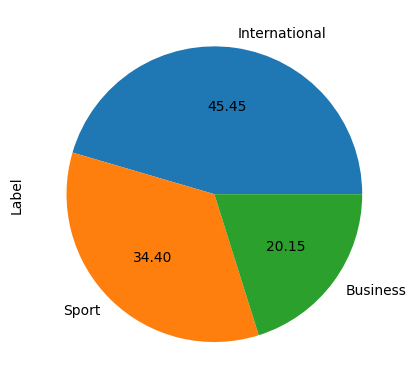

In [145]:
df.Label.value_counts().plot.pie(autopct='%.2f')

In [146]:
#Split our data into features(X) and labels(y)
X=df.drop('Label',axis=1)
y=df['Label']

# Random undersampling due to class imbalance

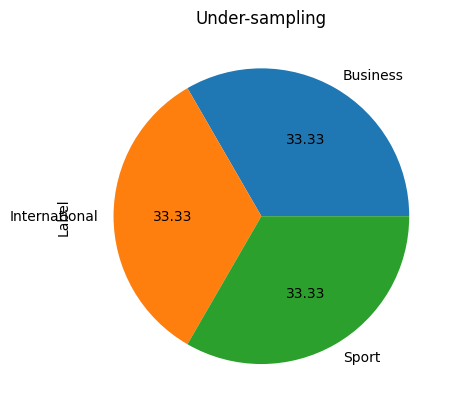

In [147]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto') # Numerical value
X_res, y_res = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")


In [148]:
X_res

,Title
0,විදේශ සංචිතය පහළට
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් සහ බොරළු කැපීම ...
2,බොරතෙල් මිල ඉහළට
3,කොටස් වෙළඳපොළ වර්ධනයක්
4,2020 දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය විස...
...,...
15964,එංගලන්ත-කොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ
15965,ඉන්දියාවේ තණතිරු වේලන ක්‍රම ගැන සමාජ මාධ්‍යයේ ...
15966,හිමාෂගේ තහනම අඩු වේ.
15967,ශ්‍රී ලංකා කණ්ඩායමේ ආරක්ෂාව වැඩි කරන්නැයි^ ක්‍...


In [149]:
y_res

0        Business
1        Business
2        Business
3        Business
4        Business
           ...   
15964       Sport
15965       Sport
15966       Sport
15967       Sport
15968       Sport
Name: Label, Length: 15969, dtype: object

In [150]:
y_res.value_counts()

Business         5323
International    5323
Sport            5323
Name: Label, dtype: int64

In [151]:
df.head()

,Title,Label
0,කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක,International
1,ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...,International
2,ඉන්දියාවේ කොරෝනා ආසාදිතයන් 71 ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International


In [152]:
X_res['Label'] = y_res
X_res

,Title,Label
0,විදේශ සංචිතය පහළට,Business
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් සහ බොරළු කැපීම ...,Business
2,බොරතෙල් මිල ඉහළට,Business
3,කොටස් වෙළඳපොළ වර්ධනයක්,Business
4,2020 දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය විස...,Business
...,...,...
15964,එංගලන්ත-කොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ,Sport
15965,ඉන්දියාවේ තණතිරු වේලන ක්‍රම ගැන සමාජ මාධ්‍යයේ ...,Sport
15966,හිමාෂගේ තහනම අඩු වේ.,Sport
15967,ශ්‍රී ලංකා කණ්ඩායමේ ආරක්ෂාව වැඩි කරන්නැයි^ ක්‍...,Sport


In [153]:
X_res['Label_num'] = X_res['Label'].map({'Business':0 , 'International':1 , 'Sport':2})
X_res.head()

,Title,Label,Label_num
0,විදේශ සංචිතය පහළට,Business,0
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් සහ බොරළු කැපීම ...,Business,0
2,බොරතෙල් මිල ඉහළට,Business,0
3,කොටස් වෙළඳපොළ වර්ධනයක්,Business,0
4,2020 දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය විස...,Business,0


In [154]:
bdf =X_res #balanced data frame
bdf

,Title,Label,Label_num
0,විදේශ සංචිතය පහළට,Business,0
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් සහ බොරළු කැපීම ...,Business,0
2,බොරතෙල් මිල ඉහළට,Business,0
3,කොටස් වෙළඳපොළ වර්ධනයක්,Business,0
4,2020 දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය විස...,Business,0
...,...,...,...
15964,එංගලන්ත-කොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ,Sport,2
15965,ඉන්දියාවේ තණතිරු වේලන ක්‍රම ගැන සමාජ මාධ්‍යයේ ...,Sport,2
15966,හිමාෂගේ තහනම අඩු වේ.,Sport,2
15967,ශ්‍රී ලංකා කණ්ඩායමේ ආරක්ෂාව වැඩි කරන්නැයි^ ක්‍...,Sport,2


In [155]:
import re
import string

In [156]:
bdf["Title"].head(5)

0                                    විදේශ සංචිතය පහළට
1    අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් සහ බොරළු කැපීම ...
2                                     බොරතෙල් මිල ඉහළට
3                               කොටස් වෙළඳපොළ වර්ධනයක්
4    2020 දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය විස...
Name: Title, dtype: object

Remove punctuations

In [157]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [158]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

bdf["Title"] = bdf["Title"].apply(remove_punctuations)

In [159]:
bdf

,Title,Label,Label_num
0,විදේශ සංචිතය පහළට,Business,0
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් සහ බොරළු කැපීම ...,Business,0
2,බොරතෙල් මිල ඉහළට,Business,0
3,කොටස් වෙළඳපොළ වර්ධනයක්,Business,0
4,2020 දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය විස...,Business,0
...,...,...,...
15964,එංගලන්තකොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ,Sport,2
15965,ඉන්දියාවේ තණතිරු වේලන ක්‍රම ගැන සමාජ මාධ්‍යයේ ...,Sport,2
15966,හිමාෂගේ තහනම අඩු වේ,Sport,2
15967,ශ්‍රී ලංකා කණ්ඩායමේ ආරක්ෂාව වැඩි කරන්නැයි ක්‍ර...,Sport,2


remove numbers

In [160]:
bdf["Title"] = bdf['Title'].str.replace('\d+', '', regex=True)

In [161]:
bdf

,Title,Label,Label_num
0,විදේශ සංචිතය පහළට,Business,0
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් සහ බොරළු කැපීම ...,Business,0
2,බොරතෙල් මිල ඉහළට,Business,0
3,කොටස් වෙළඳපොළ වර්ධනයක්,Business,0
4,දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය විසින් ...,Business,0
...,...,...,...
15964,එංගලන්තකොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ,Sport,2
15965,ඉන්දියාවේ තණතිරු වේලන ක්‍රම ගැන සමාජ මාධ්‍යයේ ...,Sport,2
15966,හිමාෂගේ තහනම අඩු වේ,Sport,2
15967,ශ්‍රී ලංකා කණ්ඩායමේ ආරක්ෂාව වැඩි කරන්නැයි ක්‍ර...,Sport,2


remove stopwords

In [162]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
import nltk

In [164]:
with open('stop words.txt', 'r') as file:
    sw = file.read().splitlines()

In [165]:
sw

['සහ',
 'සමග',
 'සමඟ',
 'අහා',
 'ආහ්',
 'ආ',
 'ඕහෝ',
 'අනේ',
 'අඳෝ',
 'අපොයි',
 'අපෝ',
 'අයියෝ',
 'ආයි',
 'ඌයි',
 'චී',
 'චිහ්',
 'චික්',
 'හෝ\u200d',
 'දෝ',
 'දෝහෝ',
 'මෙන්',
 'සේ',
 'වැනි',
 'බඳු',
 'වන්',
 'අයුරු',
 'අයුරින්',
 'ලෙස',
 'වැඩි',
 'ශ්\u200dරී',
 'හා',
 'ය',
 'නිසා',
 'නිසාවෙන්',
 'බවට',
 'බව',
 'බවෙන්',
 'නම්',
 'වැඩි',
 'සිට',
 'දී',
 'මහා',
 'මහ',
 'පමණ',
 'පමණින්',
 'පමන',
 'වන',
 'විට',
 'විටින්',
 'මේ',
 'මෙලෙස',
 'මෙයින්',
 'ඇති',
 'ලෙස',
 'සිදු',
 'වශයෙන්',
 'යන',
 'සඳහා',
 'මගින්',
 'හෝ\u200d',
 'ඉතා',
 'ඒ',
 'එම',
 'ද',
 'අතර',
 'විසින්',
 'සමග',
 'පිළිබඳව',
 'පිළිබඳ',
 'තුළ',
 'බව',
 'වැනි',
 'මහ',
 'මෙම',
 'මෙහි',
 'මේ',
 'වෙත',
 'වෙතින්',
 'වෙතට',
 'වෙනුවෙන්',
 'වෙනුවට',
 'වෙන',
 'ගැන',
 'නෑ',
 'අනුව',
 'නව',
 'පිළිබඳ',
 'විශේෂ',
 'දැනට',
 'එහෙන්',
 'මෙහෙන්',
 'එහේ',
 'මෙහේ',
 'ම',
 'තවත්',
 'තව ',
 'සහ',
 'දක්වා',
 'ට',
 'ගේ',
 'එ',
 'ක',
 'ක්',
 'බවත්',
 'බවද',
 'මත',
 'ඇතුලු',
 'ඇතුළු',
 'මෙසේ',
 'වඩා',
 'වඩාත්ම',
 'නිති',
 'නිතිත්',
 'නිතොර',
 'නිතර',
 

In [166]:
bdf["Title"] = bdf["Title"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [167]:
bdf

,Title,Label,Label_num
0,විදේශ සංචිතය පහළට,Business,0
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් බොරළු කැපීම කඩි...,Business,0
2,බොරතෙල් මිල ඉහළට,Business,0
3,කොටස් වෙළඳපොළ වර්ධනයක්,Business,0
4,දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය නිසි කලට...,Business,0
...,...,...,...
15964,එංගලන්තකොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ,Sport,2
15965,ඉන්දියාවේ තණතිරු වේලන ක්‍රම සමාජ මාධ්‍යයේ කතාබහක්,Sport,2
15966,හිමාෂගේ තහනම අඩු වේ,Sport,2
15967,ලංකා කණ්ඩායමේ ආරක්ෂාව කරන්නැයි ක්‍රිකට් ආයතනය ...,Sport,2


In [168]:
with open('suffixes_list.txt', 'r') as file:
    sw = file.read().splitlines()


bdf["Title"] = bdf["Title"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [169]:
bdf

,Title,Label,Label_num
0,විදේශ සංචිතය පහළට,Business,0
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල් බොරළු කැපීම කඩි...,Business,0
2,බොරතෙල් මිල ඉහළට,Business,0
3,කොටස් වෙළඳපොළ වර්ධනයක්,Business,0
4,දෘෂ්ටි දිනයට සමගාමීව විෂන් කෙයා ආයතනය නිසි කලට...,Business,0
...,...,...,...
15964,එංගලන්තකොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ,Sport,2
15965,ඉන්දියාවේ තණතිරු වේලන ක්‍රම සමාජ මාධ්‍යයේ කතාබහක්,Sport,2
15966,හිමාෂගේ තහනම අඩු,Sport,2
15967,ලංකා කණ්ඩායමේ ආරක්ෂාව කරන්නැයි ක්‍රිකට් ආයතනය ...,Sport,2


stemming

In [170]:
with open('stem_dictionary.txt', 'r') as file:
    sw = file.read().splitlines()

In [171]:
sw

['අංකද\tඅංක',
 'අංකය\tඅංක',
 'අංකයක්\tඅංක',
 'අංකයට\tඅංක',
 'අංකයටද\tඅංක',
 'අංකයන්ට\tඅංක',
 'අංකයන්ටද\tඅංක',
 'අංකවල\tඅංක',
 'අංකවලට\tඅංක',
 'අංකවලින්\tඅංක',
 'අංගණයට\tඅංගණය',
 'අංගණයේ\tඅංගණය',
 'අංගනය\tඅංගන',
 'අංගනයක\tඅංගන',
 'අංගනයක්\tඅංගන',
 'අංගයක්\tඅංගය',
 'අංගවලින්\tඅංගවල',
 'අංගොඩට\tඅංගොඩ',
 'අංගෝපාංගයන්\tඅංගෝපාංග',
 'අංශභාගය\tඅංශභාග',
 'අංශයකට\tඅංශය',
 'අංශයකම\tඅංශය',
 'අංශයක්\tඅංශය',
 'අංශයකින්\tඅංශය',
 'අංශයකින්ම\tඅංශය',
 'අංශයට\tඅංශය',
 'අංශයටත්\tඅංශය',
 'අංශයටද\tඅංශය',
 'අංශයන්\tඅංශය',
 'අංශයන්ගෙන්\tඅංශය',
 'අංශයන්ගේ\tඅංශය',
 'අංශයන්හි\tඅංශය',
 'අංශයෙන්\tඅංශය',
 'අංශයෙන්ද\tඅංශය',
 'අංශවලට\tඅංශවල',
 'අංශවලින්\tඅංශවල',
 'අකටයුත්තකට\tඅකටයුත්ත',
 'අකටයුත්තක්\tඅකටයුත්ත',
 'අකටයුතුකම්වලට\tඅකටයුතුකම්',
 'අකටයුතුකම්වලින්\tඅකටයුතුකම්',
 'අකණ්ඩව\tඅකණ්ඩ',
 'අකමැත්තක්\tඅකමැත්ත',
 'අකමැත්තකින්\tඅකමැත්ත',
 'අකමැත්තද\tඅකමැත්ත',
 'අකමැත්තෙන්\tඅකමැත්ත',
 'අකමැතිවී\tඅකමැතිව',
 'අකමැතිවීම\tඅකමැතිව',
 'අකමැතිවූ\tඅකමැතිව',
 'අකරතැබ්බය\tඅකරතැබ්බ',
 'අකර්මණ්යය\tඅකර්මණ්ය',
 'අකලංකගේ\tඅකලංක',
 'අ

In [172]:
wd = []
stem = []
Dict = {}
for twords in sw:
  word = twords.split('\t')
  Dict[word[0]] = word[1]
  #stem.append(word[1])
  #wd.append(word[0])


In [173]:
Dict

{'අංකද': 'අංක',
 'අංකය': 'අංක',
 'අංකයක්': 'අංක',
 'අංකයට': 'අංක',
 'අංකයටද': 'අංක',
 'අංකයන්ට': 'අංක',
 'අංකයන්ටද': 'අංක',
 'අංකවල': 'අංක',
 'අංකවලට': 'අංක',
 'අංකවලින්': 'අංක',
 'අංගණයට': 'අංගණය',
 'අංගණයේ': 'අංගණය',
 'අංගනය': 'අංගන',
 'අංගනයක': 'අංගන',
 'අංගනයක්': 'අංගන',
 'අංගයක්': 'අංගය',
 'අංගවලින්': 'අංගවල',
 'අංගොඩට': 'අංගොඩ',
 'අංගෝපාංගයන්': 'අංගෝපාංග',
 'අංශභාගය': 'අංශභාග',
 'අංශයකට': 'අංශය',
 'අංශයකම': 'අංශය',
 'අංශයක්': 'අංශය',
 'අංශයකින්': 'අංශය',
 'අංශයකින්ම': 'අංශය',
 'අංශයට': 'අංශය',
 'අංශයටත්': 'අංශය',
 'අංශයටද': 'අංශය',
 'අංශයන්': 'අංශය',
 'අංශයන්ගෙන්': 'අංශය',
 'අංශයන්ගේ': 'අංශය',
 'අංශයන්හි': 'අංශය',
 'අංශයෙන්': 'අංශය',
 'අංශයෙන්ද': 'අංශය',
 'අංශවලට': 'අංශවල',
 'අංශවලින්': 'අංශවල',
 'අකටයුත්තකට': 'අකටයුත්ත',
 'අකටයුත්තක්': 'අකටයුත්ත',
 'අකටයුතුකම්වලට': 'අකටයුතුකම්',
 'අකටයුතුකම්වලින්': 'අකටයුතුකම්',
 'අකණ්ඩව': 'අකණ්ඩ',
 'අකමැත්තක්': 'අකමැත්ත',
 'අකමැත්තකින්': 'අකමැත්ත',
 'අකමැත්තද': 'අකමැත්ත',
 'අකමැත්තෙන්': 'අකමැත්ත',
 'අකමැතිවී': 'අකමැතිව',
 'අකමැතිවීම': 'අකමැතිව'

In [176]:

def add_stem(text):
    for word in Dict:
        text = text.replace(word, Dict[word])
    return text

bdf["Title"] = bdf["Title"].apply(add_stem)

In [175]:
bdf

,Title,Label,Label_num
0,විදේශ සංචිත පහළට,Business,0
1,අමුද්‍රව්‍ය හිඟය වලකන්න කළුගල බොරළු කැපීම කඩින...,Business,0
2,බොරතෙල් මිල ඉහළට,Business,0
3,කොටස් වෙළඳපොළ වර්ධන,Business,0
4,දෘෂ්ටි දිනයට සමගාමී විෂන් කෙයා ආයතනය නිසි කලට ...,Business,0
...,...,...,...
15964,එංගලන්තකොදෙව් ටෙස්ට් තරගාවලිය හෙට ඇරඹේ,Sport,2
15965,ඉන්දියාව තණතිරු වේලන ක්‍රම සමාජ මාධ්‍යයේ කතාබහක,Sport,2
15966,හිමාෂගේ තහනම අඩු,Sport,2
15967,ලංකා කණ්ඩායේ ආරක්ෂාව කරන්නැයි ක්‍රිකට් ආයතනය අ...,Sport,2


In [177]:
from collections import Counter
vocab = Counter()

for sentence in bdf['Title']:
    vocab.update(sentence.split())

In [178]:
vocab

Counter({'විදේශ': 112,
         'සංචිත': 144,
         'පහළට': 347,
         'අමුද්\u200dරව්\u200dය': 1,
         'හිඟය': 11,
         'වලකන්න': 1,
         'කළුගල': 1,
         'බොරළු': 2,
         'කැපීම': 2,
         'කඩිනම්': 11,
         'ක්\u200dරමවේදය': 12,
         'බොරතෙල්': 55,
         'මිල': 580,
         'ඉහළට': 557,
         'කොටස්': 590,
         'වෙළඳපොළ': 151,
         'වර්ධන': 255,
         'දෘෂ්ටි': 1,
         'දිනයට': 9,
         'සමගාමී': 3,
         'විෂන්': 1,
         'කෙයා': 1,
         'ආයතනය': 20,
         'නිසි': 7,
         'කලට': 2,
         'අක්ෂි': 1,
         'පරීක්ෂාවන්': 1,
         'සිදුකර': 1,
         'ගැනීමේ': 28,
         'වැදගත්කම': 2,
         'පෙන්වාදෙයි': 2,
         'ලෙඩ': 3,
         'හදාගන්න': 1,
         'නැතුව': 4,
         'ගෙදර': 12,
         'ඉඳන්': 2,
         'තෝරල': 1,
         'ගන්න': 62,
         'වෙළඳපොල': 138,
         'පසුගිය': 27,
         'වසරේ': 81,
         'පළතුර': 31,
         'ආනයනය': 63,
         'ඇඩො': 15,
         '

In [179]:
len(vocab)

14198

In [219]:
tokens = [key for key in vocab if vocab[key] > 3]

In [220]:
len(tokens)

3678

In [221]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'vocabulary.txt')

divide dataset

In [222]:
X = bdf['Title']
y = bdf['Label_num']

In [223]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [225]:
X_train.shape

(12775,)

In [226]:
X_test.shape

(3194,)

In [227]:
y_train.shape


(12775,)

In [228]:
y_test.shape

(3194,)

In [229]:
X_train

15125                      පාසල් ක්‍රිකට් තරග කිහිපයක් අදත
14570             බංග්ලාදේශ පැවති එක්දින තරඟේ ජය නවසීලන්තය
8865                  යුරෝපය උණුසුම මැද පෘතුගාලේ ලැව් ගිනි
6746                  ජග සංවිධාන මහලේකම්වරයා උතුරු කොරියාව
7525               ඇමරිකා චීන විදේශ ඇමතිවරු දුරකථන සංවාදයක
                               ...                        
14768                   මොහොමඩ් හෆීස්ට පන්දු යැවීමේ තහනමක්
10108                                     ජපානේ භූ කම්පනක්
1642                                      රන් අවුන්ස් ඩොලර
9564     රොබෝ හැක් වීම අපරාධ බිහිවිය හැකි අනතුරු ඇඟවීම ...
2635          කල් ඉකුත් වූ පරිප්පු ගෝනි වත්තලින් සොයා ගැනේ
Name: Title, Length: 12775, dtype: object

In [230]:
y_train

15125    2
14570    2
8865     1
6746     1
7525     1
        ..
14768    2
10108    1
1642     0
9564     1
2635     0
Name: Label_num, Length: 12775, dtype: int64

In [231]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [232]:
import numpy as np
vectorized_x_train = vectorizer(X_train, tokens)

In [233]:
vectorized_x_test = vectorizer(X_test, tokens)

In [234]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [235]:
y_train

15125    2
14570    2
8865     1
6746     1
7525     1
        ..
14768    2
10108    1
1642     0
9564     1
2635     0
Name: Label_num, Length: 12775, dtype: int64

In [236]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [237]:
y_test

1218     0
2425     0
2248     0
3272     0
6874     1
        ..
7529     1
8420     1
13605    2
9207     1
12669    2
Name: Label_num, Length: 3194, dtype: int64

In [238]:
y_train.value_counts()

0    4290
2    4287
1    4198
Name: Label_num, dtype: int64

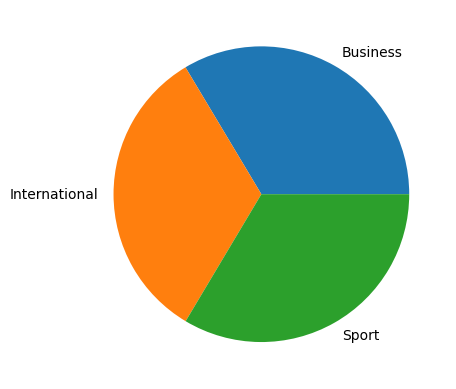

In [241]:
import matplotlib.pyplot as plt
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1],y_train.value_counts()[2]]), labels=['Business','International', 'Sport'])
plt.show()

Model Training and Evaluation

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [244]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [253]:
y_train.value_counts()

0    4290
2    4287
1    4198
Name: Label_num, dtype: int64

In [256]:
y_test.value_counts()

1    1125
2    1036
0    1033
Name: Label_num, dtype: int64

In [257]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [258]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Model training and evaluation

In [264]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create an instance of Logistic Regression
classifier = LogisticRegression()

# Create an instance of OneVsRestClassifier with Logistic Regression as the base classifier
ovr_classifier = OneVsRestClassifier(classifier)

# Train the OvR classifier
ovr_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = ovr_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [265]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Create an instance of Random Forest Classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [266]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create an instance of Support Vector Machine (SVM) Classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [267]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Create an instance of Multinomial Naive Bayes Classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30

